### Introduction: Project Goal
    
The goal of this project is to uncover insights about Netflix shows to understand historical patterns and trends.

### Background

### Data and Methodology
This Netflix TV Shows and Movies data set was retrieved from the Kaggle data set library https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

In [25]:
import pandas as pd
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("C:/Users/yzhou/Desktop/Netflix TV and Movies Data July 2022/titles.csv")
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [27]:
print(df.shape)

(5850, 15)


View how many rows are shows

In [28]:
netflix_shows = df.loc[df['type'] == 'SHOW']
print(netflix_shows.shape)

(2106, 15)


In [29]:
netflix_seasons_count = df.loc[df['type'] == 'SHOW'].groupby(['seasons', 'release_year']).count().reset_index()
netflix_seasons_count.head()

,seasons,release_year,id,title,type,description,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,1.0,1945,1,1,1,1,1,1,1,1,0,0,0,1,0
1,1.0,1972,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1.0,1988,1,1,1,1,1,1,1,1,1,1,1,1,0
3,1.0,1991,1,1,1,1,1,1,1,1,0,0,0,1,1
4,1.0,1995,1,1,1,1,1,1,1,1,1,1,1,1,1


In [30]:
netflix_seasons_count.sort_values('seasons',ascending=True, inplace=True)
netflix_seasons_count.head(10)

,seasons,release_year,id,title,type,description,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,1.0,1945,1,1,1,1,1,1,1,1,0,0,0,1,0
28,1.0,2022,161,161,161,161,152,161,161,161,151,146,146,160,155
26,1.0,2020,235,235,235,232,191,235,235,235,195,191,191,232,226
25,1.0,2019,187,187,187,186,144,187,187,187,166,164,164,184,179
24,1.0,2018,154,154,154,151,125,154,154,154,147,146,146,150,147
23,1.0,2017,87,87,87,87,69,87,87,87,81,81,81,87,82
22,1.0,2016,45,45,45,45,39,45,45,45,41,41,41,44,37
21,1.0,2015,19,19,19,19,18,19,19,19,18,18,18,17,13
20,1.0,2014,8,8,8,7,8,8,8,8,7,6,6,6,5
19,1.0,2013,8,8,8,8,5,8,8,8,8,8,8,6,6


In [52]:
syndicated_shows = netflix_seasons_count.loc[netflix_seasons_count['seasons']>=4].groupby(['release_year']).sum().reset_index()
syndicated_shows.tail(10)

,release_year,seasons,id,title,type,description,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
28,2012,89.0,20,20,20,20,20,20,20,20,20,20,20,20,19
29,2013,41.0,17,17,17,17,17,17,17,17,17,17,17,17,17
30,2014,45.0,26,26,26,26,25,26,26,26,25,25,25,26,26
31,2015,31.0,32,32,32,32,31,32,32,32,32,32,32,32,31
32,2016,30.0,31,31,31,31,30,31,31,31,31,31,31,31,30
33,2017,26.0,26,26,26,26,24,26,26,26,26,26,26,26,25
34,2018,23.0,34,34,34,34,34,34,34,34,34,34,34,34,34
35,2019,15.0,19,19,19,19,16,19,19,19,19,19,19,19,19
36,2020,15.0,9,9,9,9,8,9,9,9,6,6,6,9,9
37,2021,4.0,1,1,1,1,1,1,1,1,1,1,1,1,1


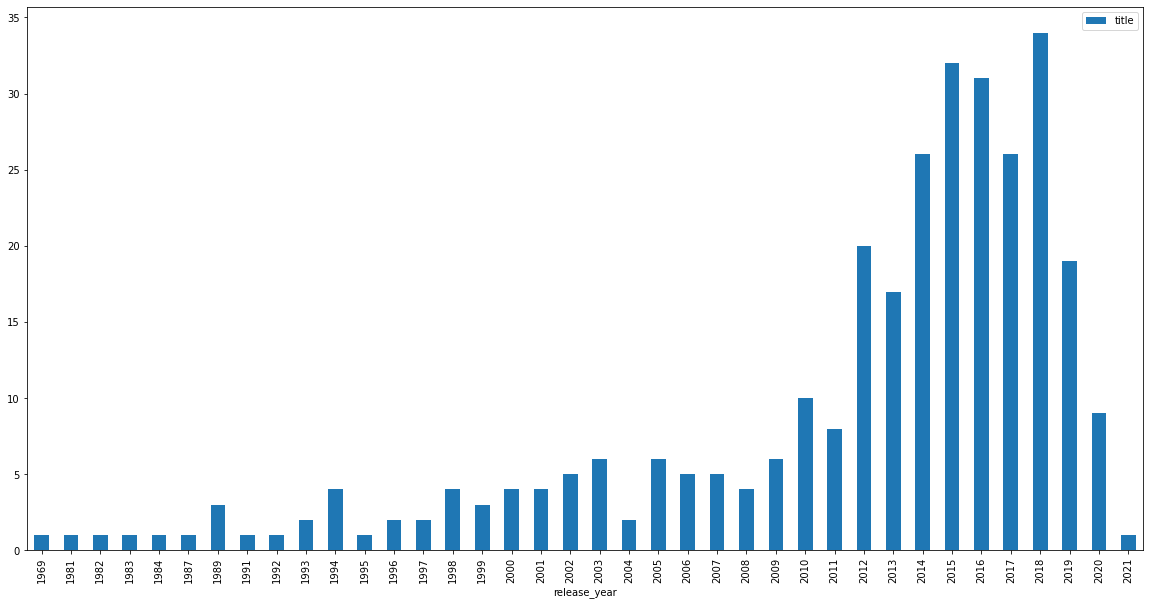

In [54]:
plot_syndicated = syndicated_shows.plot.bar(x='release_year', y='title', figsize=(20, 10), rot=90)

#### Insights:
* 58% of Netflix shows are only 1 season, while 15% of shows have reached syndication status (4 or more seasons)
* number of syndicated shows on average is around 31 from 2015 - 2018 compared with X from other streaming platforms

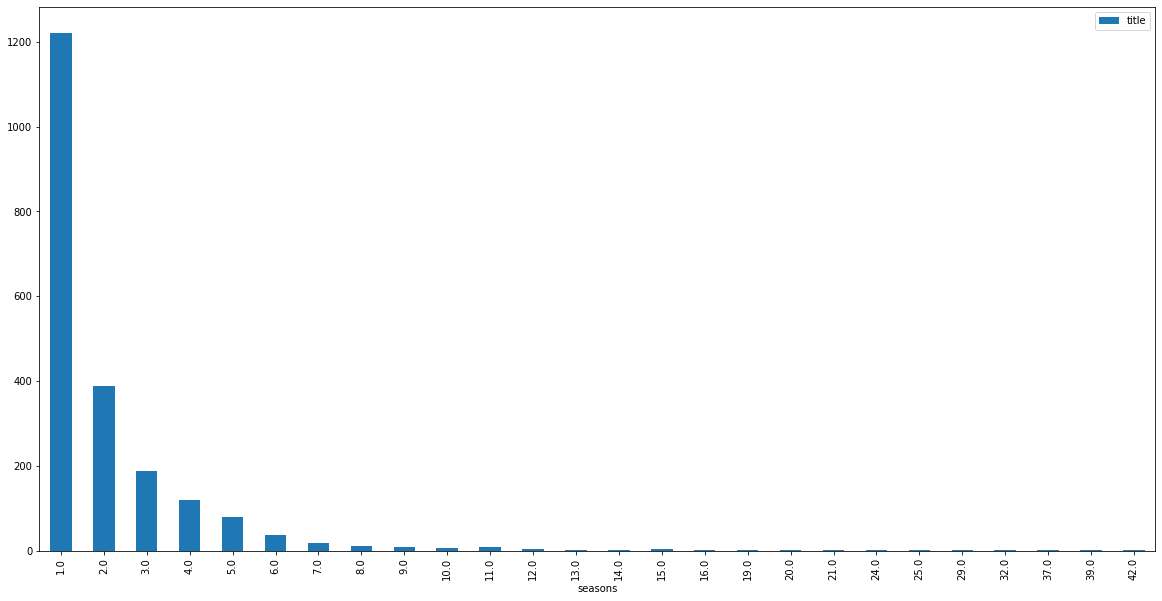

In [32]:
netflix_seasons = df.loc[df['type'] == 'SHOW'].groupby(['seasons']).count().reset_index()
plot_count = netflix_seasons.plot.bar(x='seasons', y='title', figsize=(20, 10), rot=90)